In [157]:
from datetime import datetime 
import time 
import pandas as pd 
import requests
import re
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [25]:
url = 'https://www.reddit.com/hot.json'

In [26]:
headers = {'User-agent': 'el muneco'}

In [27]:
res = requests.get(url, headers=headers)
res

<Response [200]>

In [28]:
def scrape_reddit_posts(url_tag, header, loops, waittime, filename): 
    posts = []
    after = None
    for i in range(loops):
        print(i)
        if after == None:
            params = {}
        else:
            params = {'after': after}
        url = 'https://www.reddit.com/r/'+url_tag
        res = requests.get(url,params=params,headers=headers)
        if res.status_code == 200:

            data_json = res.json()
            after = data_json['data']['after']
            for row in data_json['data']['children']:
                post = {}
                post['subreddit'] = row['data']['subreddit']
                post['title'] = row['data']['title']
                post['num_comments'] = row['data']['num_comments']
                post['ups'] = row['data']['ups']
                post['downs'] = row['data']['downs']
                post['likes'] = row['data']['likes']
                post['score'] = row['data']['score']
                post['view_count'] = row['data']['view_count']
                post['url'] = row['data']['url']
                post['time_of_pull'] = datetime.now()
                posts.append(post)
        else:
            print(res.status_code)
            break
        time.sleep(waittime)   
    df = pd.DataFrame(posts)
    now = datetime.now()
    df.to_csv(filename+now.strftime('%Y%m%d%H%S'),index=False)

In [65]:
#what happens if i run this again? how will my data frame change?
scrape_reddit_posts('football.json',header,40,1.5,'Reddit_football_')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [133]:
nfl

num_comments  score subreddit                time_of_pull  \
0            1009     77       nfl  2018-12-16 14:47:35.865819   
1              62     40       nfl  2018-12-16 14:47:35.865828   
2             549   6051       nfl  2018-12-16 14:47:35.865830   
3              97   1573       nfl  2018-12-16 14:47:35.865832   
4              90    493       nfl  2018-12-16 14:47:35.865835   
5              48    756       nfl  2018-12-16 14:47:35.865837   
6             667   6761       nfl  2018-12-16 14:47:35.865839   
7             163    395       nfl  2018-12-16 14:47:35.865841   
8             268   4037       nfl  2018-12-16 14:47:35.865843   
9              69    337       nfl  2018-12-16 14:47:35.865845   
10            213    525       nfl  2018-12-16 14:47:35.865847   
11            579   8346       nfl  2018-12-16 14:47:35.865849   
12            101    365       nfl  2018-12-16 14:47:35.865852   
13             33    180       nfl  2018-12-16 14:47:35.865854   
14             61    242       nfl  2018-12-16 14:47:35.865856   
15            207   1808       nfl  2018-12-16 14:47:35.865858   
16            165   1511       nfl  2018-12-16 14:47:35.865860   
17           2575    174       nfl  2018-12-16 14:47:35.865862   
18             27    157       nfl  2018-12-16 14:47:35.865864   
19            154   1705       nfl  2018-12-16 14:47:35.865866   
20             23    129       nfl  2018-12-16 14:47:35.865868   
21           1777   1705       nfl  2018-12-16 14:47:35.865870   
22             70    157       nfl  2018-12-16 14:47:35.865872   
23            131   1527       nfl  2018-12-16 14:47:35.865874   
24             53    306       nfl  2018-12-16 14:47:35.865876   
25            353   1367       nfl  2018-12-16 14:47:35.865878   
26           3805    134       nfl  2018-12-16 14:47:35.865881   
27            263   2895       nfl  2018-12-16 14:47:37.902966   
28           2099    111       nfl  2018-12-16 14:47:37.902977   
29            212   1002       nfl  2018-12-16 14:47:37.902980   
..            ...    ...       ...                         ...   
969            11     23       nfl  2018-12-16 14:48:48.243516   
970             3     23       nfl  2018-12-16 14:48:48.243518   
971           113    509       nfl  2018-12-16 14:48:48.243520   
972             5     20       nfl  2018-12-16 14:48:48.243522   
973            43    323       nfl  2018-12-16 14:48:48.243524   
974            36     24       nfl  2018-12-16 14:48:50.073209   
975           326     25       nfl  2018-12-16 14:48:50.073222   
976             8     17       nfl  2018-12-16 14:48:50.073226   
977            54    376       nfl  2018-12-16 14:48:50.073230   
978           492    534       nfl  2018-12-16 14:48:50.073235   
979            13     52       nfl  2018-12-16 14:48:50.073238   
980            14     18       nfl  2018-12-16 14:48:50.073241   
981             6     16       nfl  2018-12-16 14:48:50.073245   
982            64    217       nfl  2018-12-16 14:48:50.073249   
983             3     17       nfl  2018-12-16 14:48:50.073253   
984           235     23       nfl  2018-12-16 14:48:50.073256   
985            48    235       nfl  2018-12-16 14:48:50.073261   
986          9429    446       nfl  2018-12-16 14:48:50.073264   
987            12     14       nfl  2018-12-16 14:48:50.073268   
988            16     61       nfl  2018-12-16 14:48:50.073271   
989            15     13       nfl  2018-12-16 14:48:50.073276   
990            26    227       nfl  2018-12-16 14:48:50.073279   
991             9     96       nfl  2018-12-16 14:48:50.073283   
992           926     27       nfl  2018-12-16 14:48:50.073288   
993           189   1004       nfl  2018-12-16 14:48:50.073292   
994            51     34       nfl  2018-12-16 14:48:50.073295   
995           309     18       nfl  2018-12-16 14:48:50.073299   
996             4     11       nfl  2018-12-16 14:48:50.073302   
997           200   1248       nfl  2018-12-1

In [ ]:
scrape_reddit_posts('nfl.json',header,40,1.5,'Reddit_nfl_')

### cleaning and EDA

In [294]:
nfl = pd.read_csv('../data/Reddit_nfl_201812161451')
nfl.drop(columns=['downs', 'likes','view_count'], inplace = True)

In [295]:
fut = pd.read_csv('../data/Reddit_football_201812161530')
fut.drop(columns=['downs', 'likes', 'view_count'], inplace = True)

In [296]:
#how do i treat that emoji?
fut.head()

num_comments  score subreddit                time_of_pull  \
0             0      2  football  2018-12-16 15:21:10.471588   
1            48     34  football  2018-12-16 15:21:10.471597   
2             0      2  football  2018-12-16 15:21:10.471599   
3             1      2  football  2018-12-16 15:21:10.471601   
4             0      6  football  2018-12-16 15:21:10.471604   

                                               title  ups  \
0  Weekly /r/Football Discussion - December 11, 2018    2   
1                                               Hi 🙂   34   
2  Match Thread: RB Leipzig vs Mainz [Regular Sea...    2   
3  Dier injury causes fans to call for January sp...    2   
4  Ten Likely January Window Stories and how they...    6   

                                                 url  
0  https://www.reddit.com/r/football/comments/a5a...  
1  https://www.reddit.com/r/football/comments/a6m...  
2  https://www.reddit.com/r/football/comments/a6p...  
3  https://www.football.london/tottenham-hotspur-...  
4  https://theathleteshub.org/2018/12/15/10-poten...

In [135]:
nfl.head(50)

num_comments  score subreddit                time_of_pull  \
0           1009     77       nfl  2018-12-16 14:47:35.865819   
1             62     40       nfl  2018-12-16 14:47:35.865828   
2            549   6051       nfl  2018-12-16 14:47:35.865830   
3             97   1573       nfl  2018-12-16 14:47:35.865832   
4             90    493       nfl  2018-12-16 14:47:35.865835   
5             48    756       nfl  2018-12-16 14:47:35.865837   
6            667   6761       nfl  2018-12-16 14:47:35.865839   
7            163    395       nfl  2018-12-16 14:47:35.865841   
8            268   4037       nfl  2018-12-16 14:47:35.865843   
9             69    337       nfl  2018-12-16 14:47:35.865845   
10           213    525       nfl  2018-12-16 14:47:35.865847   
11           579   8346       nfl  2018-12-16 14:47:35.865849   
12           101    365       nfl  2018-12-16 14:47:35.865852   
13            33    180       nfl  2018-12-16 14:47:35.865854   
14            61    242       nfl  2018-12-16 14:47:35.865856   
15           207   1808       nfl  2018-12-16 14:47:35.865858   
16           165   1511       nfl  2018-12-16 14:47:35.865860   
17          2575    174       nfl  2018-12-16 14:47:35.865862   
18            27    157       nfl  2018-12-16 14:47:35.865864   
19           154   1705       nfl  2018-12-16 14:47:35.865866   
20            23    129       nfl  2018-12-16 14:47:35.865868   
21          1777   1705       nfl  2018-12-16 14:47:35.865870   
22            70    157       nfl  2018-12-16 14:47:35.865872   
23           131   1527       nfl  2018-12-16 14:47:35.865874   
24            53    306       nfl  2018-12-16 14:47:35.865876   
25           353   1367       nfl  2018-12-16 14:47:35.865878   
26          3805    134       nfl  2018-12-16 14:47:35.865881   
27           263   2895       nfl  2018-12-16 14:47:37.902966   
28          2099    111       nfl  2018-12-16 14:47:37.902977   
29           212   1002       nfl  2018-12-16 14:47:37.902980   
30            36    177       nfl  2018-12-16 14:47:37.902983   
31            69    846       nfl  2018-12-16 14:47:37.902986   
32            59     73       nfl  2018-12-16 14:47:37.902989   
33            43    107       nfl  2018-12-16 14:47:37.902991   
34            39     78       nfl  2018-12-16 14:47:37.902994   
35           109   1151       nfl  2018-12-16 14:47:37.902997   
36            59    855       nfl  2018-12-16 14:47:37.903000   
37            53    919       nfl  2018-12-16 14:47:37.903004   
38            13     64       nfl  2018-12-16 14:47:37.903006   
39            16     74       nfl  2018-12-16 14:47:37.903009   
40            99    190       nfl  2018-12-16 14:47:37.903012   
41            27     50       nfl  2018-12-16 14:47:37.903015   
42             5     51       nfl  2018-12-16 14:47:37.903017   
43           206   1170       nfl  2018-12-16 14:47:37.903020   
44            16     44       nfl  2018-12-16 14:47:37.903023   
45            22     50       nfl  2018-12-16 14:47:37.903026   
46            77    153       nfl  2018-12-16 14:47:37.903029   
47           158    436       nfl  2018-12-16 14:47:37.903032   
48           875     52       nfl  2018-12-16 14:47:37.903035   
49           131   1660       nfl  2018-12-16 14:47:37.903037   

                                                title   ups  \
0             Game Thread: RedZone/Game hub (Week 15)    77   
1   Picture/GIF/Video highlights thread (Week 15, ...    40   
2   [Kinkhabwala] #Patriots owner Robert Kraft fle...  6051   
3   [Redskins] Alex Smith is finally home from the...  1573   
4   [Highlight] Rodger gets sacked by Khalil Mack'...   493   
5   [Schefter] Cowboys’ Pro-Bowl guard Zack Martin...   756   
6   [Highlight] Peppers sacks Keenum to seal the B...  6761   
7   [Rapoport] The #Ravens are going to treat Joe ...   395   
8   [Koenigsberg] For the first time in more than ...  4037   
9   [Dvorak] During a previous Jags/Skins game, Da...   33

In [297]:
frames = [fut,nfl]
df = pd.concat(frames)

In [298]:
df['is_juve'] = df['subreddit'].map(lambda x: 1 if x == 'football' else 0)

In [299]:
df.head()

num_comments  score subreddit                time_of_pull  \
0             0      2  football  2018-12-16 15:21:10.471588   
1            48     34  football  2018-12-16 15:21:10.471597   
2             0      2  football  2018-12-16 15:21:10.471599   
3             1      2  football  2018-12-16 15:21:10.471601   
4             0      6  football  2018-12-16 15:21:10.471604   

                                               title  ups  \
0  Weekly /r/Football Discussion - December 11, 2018    2   
1                                               Hi 🙂   34   
2  Match Thread: RB Leipzig vs Mainz [Regular Sea...    2   
3  Dier injury causes fans to call for January sp...    2   
4  Ten Likely January Window Stories and how they...    6   

                                                 url  is_juve  
0  https://www.reddit.com/r/football/comments/a5a...        1  
1  https://www.reddit.com/r/football/comments/a6m...        1  
2  https://www.reddit.com/r/football/comments/a6p...        1  
3  https://www.football.london/tottenham-hotspur-...        1  
4  https://theathleteshub.org/2018/12/15/10-poten...        1

In [316]:
#this is good, pretty even classification 
df['subreddit'].value_counts(normalize=False)

nfl         999
football    984
Name: subreddit, dtype: int64

In [380]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [318]:
#setting up X and y
X = df['title']
y = df['is_juve']

In [319]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=.33, stratify=y)

### CountVectorizer

In [485]:
cv = CountVectorizer(stop_words='english')
                     
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [321]:
#removing the noise
from sklearn.feature_extraction import stop_words
len(stop_words.ENGLISH_STOP_WORDS)

318

In [486]:
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

In [119]:
# count of words, with ngram_range
pd.DataFrame(X_train_cv.todense(), 
             columns=cv.get_feature_names()).sum().sort_values(ascending=False).head(10)

game thread            23
premier league         22
week 15                19
manchester united      16
nations league         14
champions league       14
real madrid            12
weekly football        12
football discussion    12
match thread           12
dtype: int64

In [487]:
# count of words without ngram_range 
pd.DataFrame(X_train_cv.todense(), 
             columns=cv.get_feature_names()).sum().sort_values(ascending=False).head(10)

football    153
nfl         120
game        117
season       72
week         67
league       66
vs           65
time         61
team         59
play         57
dtype: int64

Modeling

In [488]:
#this is my baseline
y_train.value_counts(normalize=True)[0:1]

0    0.503765
Name: is_juve, dtype: float64

### seeing if i can get a harmonic mean, no bueno
ValueError: Harmonic mean only defined if a
ll elements greater than zero"
```stats.hmean(y_train)```

### LogisReg

In [489]:
lr = LogisticRegressionCV(cv=5, Cs=100)
lr.fit(X_train_cv, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [490]:
lr.score(X_train_cv,y_train), lr.score(X_test_cv, y_test)

(0.9992469879518072, 0.9450381679389313)

In [491]:
X_train_text = pd.DataFrame(X_train_cv.todense(), columns=cv.get_feature_names())
X_train_text.head()

000  01  026  04  054  07  09  10  100  1000  ...   zidane  zim  zimmer  \
0    0   0    0   0    0   0   0   0    0     0  ...        0    0       0   
1    0   0    0   0    0   0   0   0    0     0  ...        0    0       0   
2    0   0    0   0    0   0   0   0    0     0  ...        0    0       0   
3    0   0    0   0    0   0   0   0    0     0  ...        0    0       0   
4    0   0    0   0    0   0   0   0    0     0  ...        0    0       0   

   zinedine  zoff  zone  zrebiec  élber  özil  čech  
0         0     0     0        0      0     0     0  
1         0     0     0        0      0     0     0  
2         0     0     0        0      0     0     0  
3         0     0     0        0      0     0     0  
4         0     0     0        0      0     0     0  

[5 rows x 3564 columns]

In [492]:
lr.coef_[0]

array([ 0.50107248, -0.07015292, -0.06230447, ...,  0.17838953,
        0.56646143,  0.08170051])

In [493]:
import numpy as np

coef_df = pd.DataFrame({
    'coef' : cv.get_feature_names(),
    'val': lr.coef_[0],
    'val_abs': np.abs(lr.coef_[0])
})
coef_df.sort_values('val_abs', ascending=False).head(25)

coef       val   val_abs
2177         nfl -3.282686  3.282686
1287    football  2.399560  2.399560
1532   highlight -2.331189  2.331189
1103     england  1.919110  1.919110
658     chargers -1.773255  1.773255
1701        jets -1.771960  1.771960
534       browns -1.739345  1.739345
2549     raiders -1.651981  1.651981
2732     ronaldo  1.639113  1.639113
2013       match  1.614031  1.614031
2522          qb -1.612659  1.612659
3507       world  1.603459  1.603459
3099      sunday -1.524534  1.524534
489         bowl -1.491609  1.491609
3251   tottenham  1.465548  1.465548
2398     playoff -1.464805  1.464805
3447        week -1.459034  1.459034
1986  manchester  1.410248  1.410248
1862      league  1.364242  1.364242
2715      rivers -1.340917  1.340917
303      arsenal  1.336756  1.336756
665      chelsea  1.313809  1.313809
1940     looking -1.313094  1.313094
2839      season -1.310670  1.310670
2058       messi  1.301272  1.301272

In [152]:
#df[df['title'].str.contains('Texans')].head()

In [494]:
df['title'][99]

99    Compactness and how it can be used subtly to c...
99    [Bobby Belt] If Dak Prescott starts the final ...
Name: title, dtype: object

### Pipe it up

In [497]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words= 'english', 
                           ngram_range= (2,2))),
    ('lr', LogisticRegressionCV(cv=5, Cs=100))
])
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test,y_test)

(0.9887048192771084, 0.9022900763358779)

In [498]:
pipe.predict(['football'])

array([0])

### DecisionTree 
    1)use the esemble methods to see how they perform. 
    2)Look at the feature importances.(cant look these up bc its only one tree) 
    3)Sort the values. 

In [308]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score

In [499]:
tree = DecisionTreeClassifier(max_depth=30)

In [500]:
tree.fit(X_train_cv, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [501]:
tree.score(X_train_cv, y_train), tree.score(X_test_cv, y_test)

(0.8870481927710844, 0.8381679389312977)

In [502]:
cross_val_score(tree, X_train_cv, y_train, cv=3, error_score='raise').mean()

0.8147690401043208

In [503]:
tree.fit(X_train_cv,y_train)
tree.score(X_train_cv, y_train), tree.score(X_test_cv, y_test)

(0.8870481927710844, 0.8519083969465648)

### Bagging using sklearn

In [504]:
bag = BaggingClassifier()
bag.fit(X_train_cv,y_train)
bag.score(X_train_cv, y_train), bag.score(X_test_cv, y_test)

(0.9894578313253012, 0.8961832061068702)

In [505]:
#Variance got better.
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,min_samples_leaf=2))
bag.fit(X_train_cv, y_train)
bag.score(X_train_cv,y_train), bag.score(X_test_cv, y_test)

(0.7176204819277109, 0.683969465648855)

In [506]:
# tuned parameter with n_estimators, scores got a little better  
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), 
                        n_estimators=30,bootstrap_features=False)
bag.fit(X_train_cv, y_train)
bag.score(X_train_cv,y_train), bag.score(X_test_cv, y_test)

(0.8185240963855421, 0.783206106870229)

In [508]:
len(bag.predict(X_train_cv))

1328

In [509]:
predictions = bag.predict(X_train_cv)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [368]:
predictions.shape

(1328,)

In [510]:
bag.predict_proba(X_train_cv)

array([[0.        , 1.        ],
       [0.2261849 , 0.7738151 ],
       [0.40725824, 0.59274176],
       ...,
       [0.40725824, 0.59274176],
       [0.40725824, 0.59274176],
       [0.40725824, 0.59274176]])

In [ ]:
# no bueno labels dont match my samples 
# predictions = pd.DataFrame(index=X_test.index)
# for i in range(1,11):
#     X_sample = X_train.sample(n=X_train.shape[0], replace=True) #created a bootstrap sample
#     y_sample = y_train[X_sample.index]
#     t = DecisionTreeClassifier()
#     t.fit(X_sample, y_sample)
#     predictions['Tree {}'.format(i)] = t.predict(X_test)
# predictions.head()

### Train a RanFor or ExTrees

In [511]:
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [512]:
cross_val_score(rf,X_train_cv,y_train,cv=3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8795150982775469

In [513]:
cross_val_score(et,X_train_cv,y_train,cv=3).mean()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9028596331743324

In [516]:
np.sqrt(len(X_train))

36.4417343165772

In [517]:
np.log2(len(X_train))

10.375039431346925

###  Grid Search on  
 `ExtraTreesClassifier()` b/c it gave me a better cross val. 

In [518]:
et = ExtraTreesClassifier()
et_params = {
    'n_estimators': [3,6,10],
    'max_depth': [None, 1,2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf' : [1,5,10]
    
}
gs =GridSearchCV(et, param_grid=et_params, cv=10)
gs.fit(X_train_cv, y_train)
print(gs.best_score_)
gs.best_params_

0.927710843373494


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 6}

In [519]:
#gs.best_estimator_.feature_importances_
gs.score(X_test_cv,y_test)

0.9404580152671755

In [520]:
feature_importances = pd.DataFrame(gs.best_estimator_.feature_importances_,
                                   index = cv.get_feature_names(),
                                    columns=['importance']).sort_values('importance',ascending=False)

In [521]:
feature_importances[feature_importances['importance'] == 0.0].head()

importance
occur               0.0
probability         0.0
yeah                0.0
named               0.0
yds                 0.0

In [475]:
indices

['importance']

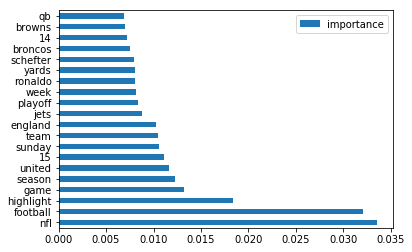

In [522]:
feature_importances[feature_importances['importance'] > 0].head(20).plot(kind='barh')

In [530]:
df[['football' in each.lower() for each in df['title']]].groupby('subreddit').count()

num_comments  score  time_of_pull  title  ups  url  is_juve
subreddit                                                             
football            189    189           189    189  189  189      189
nfl                  28     28            28     28   28   28       28

In [533]:
[title for title in df[df['subreddit'] == 'nfl']['title'] if 'football' in title.lower()]

['[Schefter] Cowboys’ Pro-Bowl guard Zack Martin will miss the first football game at any level of career today in Indianapolis. Never missed one in high school, at Notre Dame, or in NFL.',
 '[Schefter] Redskins’ QB Alex Smith has been released from the hospital after surgeries and infection, sources tell @john_keim and me. His football future remains uncertain.',
 'Nate Burllson needs to do Monday night football!',
 'Honestly, that was some of the worst situational football by Vance Joseph near the end of the game. What was he thinking?',
 'Teddy Roosevelt helped institute the forward pass so football players would stop dying so much | SB Nation',
 '[Vacchiano] Jets S Jamal Adams: “We’re a good football team. I don’t understand all the (talk) of how just because we’re losing we’re a bad football team.”',
 'If the Browns can complete mission impossible and make the playoffs, they will be just the 7th side in the Super Bowl era to do so the year after having the worst/joint worst record

In [534]:
[title for title in df[df['subreddit'] == 'football']['title'] if 'football' in title.lower()]

['Weekly /r/Football Discussion - December 11, 2018',
 'Football streaming?',
 'Crazy dudes doing football tricks in mid-air',
 'Should I join a football club?',
 'Lost of Interest to watch real madrid champions league in 18/19 maybe because that ronaldo left to juventus or not. Maybe that i am losing interest of football since ronaldo left, and no more rival between messi and ronaldo since i watch from 2011.',
 'Football walkout song poll',
 'The Data Day: Awesome Azpi | Official Site | Chelsea Football Club',
 'River Plate 3-1 Boca Juniors (5-3 agg): Copa Libertadores final, second leg – live! | Football',
 'Why Do You Wear Football Kits?',
 'Neymar wants to play in England - Football News Scorenga UK',
 'The man who dribbled into battle: a previously untold story of football in WWI',
 "City can't always play fantasy football, says Kompany as the champions beat Watford",
 "'A brighter future for amputee football: Owen Coyle Jr discusses why he only sees growth for the sport'",
 'Foot

In [523]:
df[df['title'].str.contains('Week 15')]['title']

0                Game Thread: RedZone/Game hub (Week 15)
1      Picture/GIF/Video highlights thread (Week 15, ...
91       Playoff Game Picture for Sunday (Week 15, 2018)
180               Booth Review (Week 15, Saturday games)
194    Picture/GIF/Video highlights thread (Week 15, ...
232    NFL Week 15 Picks: TV Schedule, Final Odds And...
255                         ProCane NFL Preview: Week 15
471    [Pelissero] All 53 players on the #Vikings’ ac...
478    Picture/GIF/Video highlights thread (Week 15, ...
488                     Booth Review (Week 15, TNF game)
635            Your 2018 NFL Week 15 announcing schedule
674    Week 15 - /r/NFL Power Map - (23 Teams Remain ...
701                     Week 15 Unpopular Opinion Thread
705    All 2018 Week 15 clinching &amp; elimination s...
716    Biggest injury questions for all 32 teams in W...
734    [Yates] Chiefs RB Spencer Ware is doubtful to ...
745       2018 Week 15 Comprehensive NFC Playoff Picture
816         NFL Week 15 Predict

In [524]:
df[df['title'].str.contains('Week 14')]['title']

599                           Overlooked Week 14 winners
608                   NFL Imperialism Map - Week 14 2018
752                   Top 5 Offensive Lines from Week 14
789                     [OC] Punt Rank - Week 14 edition
828               Official Week 14 /r/nfl Power Rankings
839    Monday Night Football ratings are the lowest f...
875                       2018 State Of The Subs Week 14
Name: title, dtype: object